In [29]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.model import Sequential
from keras.layer import Dense

Using TensorFlow backend.


ImportError: No module named tensorflow

In [10]:
#Read in white wine data
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [ ]:
#print (white.info())
#print (red.info())

In [16]:
#red.head()
#red.tail()
red.sample(5)
#red.describe()
#pd.isnull(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1450,7.2,0.370,0.32,2.00,0.062,15.0,28.0,0.99470,3.23,0.73,11.3,7
598,8.5,0.585,0.18,2.10,0.078,5.0,30.0,0.99670,3.20,0.48,9.8,6
775,7.2,1.000,0.00,3.00,0.102,7.0,16.0,0.99586,3.43,0.46,10.0,5
818,7.1,0.715,0.00,2.35,0.071,21.0,47.0,0.99632,3.29,0.45,9.4,5
138,7.8,0.560,0.19,2.10,0.081,15.0,105.0,0.99620,3.33,0.54,9.5,5


In [ ]:
#white.head()
#white.tail()
#white.sample(5)
#white.describe()
#pd.isnull(white)

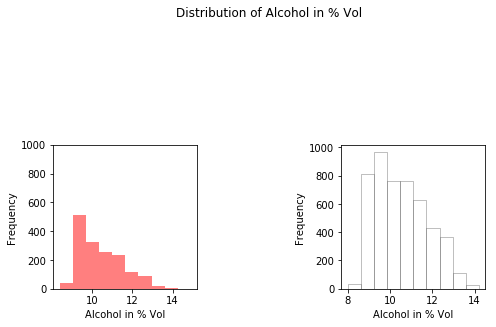

In [3]:
#Visualizing the data
fig,ax=plt.subplots(1,2)
ax[0].hist(red.alcohol,10,facecolor='red',alpha=0.5,label="Red Wine")
ax[1].hist(white.alcohol,10,facecolor='white',ec="black",lw=0.5,alpha=0.5,label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
fig.suptitle("Distribution of Alcohol in % Vol")
plt.show()

In [4]:
#Adding the Wine type Lable in in both red wine dataset and white wine and concatenating them to form one big training set.

red['type']=1
white['type']=0
wines=red.append(white,ignore_index=True)
wines.sample(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5937,7.3,0.19,0.27,13.9,0.057,45.0,155.0,0.99807,2.94,0.41,8.8,8,0
5118,6.9,0.33,0.62,7.5,0.038,46.0,132.0,0.99143,3.23,0.43,13.4,7,0
578,8.8,0.47,0.49,2.9,0.085,17.0,110.0,0.99820,3.29,0.60,9.8,5,1
6397,5.9,0.32,0.19,14.5,0.042,37.0,115.0,0.99684,3.16,0.43,10.3,5,0
5448,8.2,0.31,0.43,7.0,0.047,18.0,87.0,0.99628,3.23,0.64,10.6,5,0
354,6.1,0.21,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6,1
4312,6.8,0.23,0.42,7.4,0.044,56.0,189.0,0.99580,3.22,0.48,9.3,6,0


AttributeError: 'module' object has no attribute 'plt'

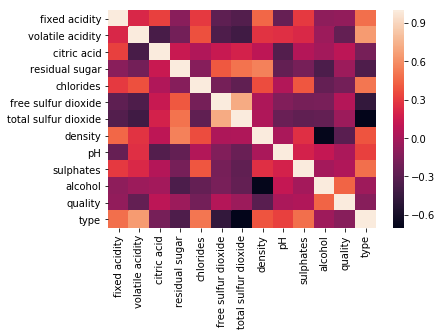

In [5]:
#Watching coorelation between variable in dataset.
corr=wines.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
sns.plt.show()

In [28]:
#Creating the dataset for training and testing the model.
X=wines.iloc[:,0:11]
y=np.ravel(wines.type)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3103,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2
1419,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9
4761,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0
4690,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5
4032,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9


In [27]:
scalar=StandardScaler().fit(X_train)
X_train=scalar.transform(X_train)
X_test=scalar.transform(X_test)  #The return type is numpy array.
X_test

array([[-0.15320549, -1.02763891,  2.90709264, ...,  0.26550293,
        -1.02387648,  1.43824924],
       [ 0.39305527,  1.8800575 , -0.76029795, ...,  0.32808925,
        -0.54255041, -0.48851915],
       [-0.30927999,  0.33341047,  0.13925069, ..., -0.23518768,
        -0.61131128,  1.27070417],
       ..., 
       [-1.4018015 , -0.16151658,  1.03879932, ...,  0.4532619 ,
         1.58903645, -0.40474661],
       [-0.15320549, -0.16151658, -0.4143177 , ..., -0.5481193 ,
        -0.47378955, -0.57229169],
       [-0.69946624, -0.65644362, -0.76029795, ...,  0.89136618,
        -1.36768081, -0.32097407]])